In [1]:
# 
# Generative AI for Data Insights 
#

In [2]:
# 目標
# 在本實驗中，您將學習如何建立提示來產生可以執行以下操作的 Python 程式碼：
#
# 產生資料集所有特徵的統計描述
# 為不同的屬性產生迴歸圖和箱線圖，以比較它們的分佈與目標屬性
# 評估資料集不同參數與目標參數的相關值、皮爾遜係數和p值
# 為一組參數建立資料透視表並使用 pcolor 圖進行視覺化

In [3]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [4]:
# 
# Reading the data set and generating the statistical description
#

In [5]:
# pip install pyarrow

In [6]:
import pandas as pd

def import_and_describe_data(file_path):
    # Step 1: Import the CSV file
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        return str(e)

    # Step 2: Generate the statistical description
    description = data.describe(include='all')  # 'all' to include non-numeric data

    # Additional handling for object data types
    for column in data.select_dtypes(include=['object']).columns:
        description.loc['count', column] = data[column].count()
        description.loc['unique', column] = data[column].nunique()
        description.loc['top', column] = data[column].mode().iloc[0]
        description.loc['freq', column] = data[column].value_counts().iloc[0]

    return description

# Example usage:
# file_path = 'path_to_your_file.csv'
# result = import_and_describe_data(file_path)
# print(result)

file_path = 'dataset.csv'
result = import_and_describe_data(file_path)
print(result)

<ipython-input-6-ea1ef3bc060d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

In [7]:
import pandas as pd

# 1. Import a data set from a CSV file
data = pd.read_csv('dataset.csv')

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [9]:
#
# Creating parameter visualizations
#

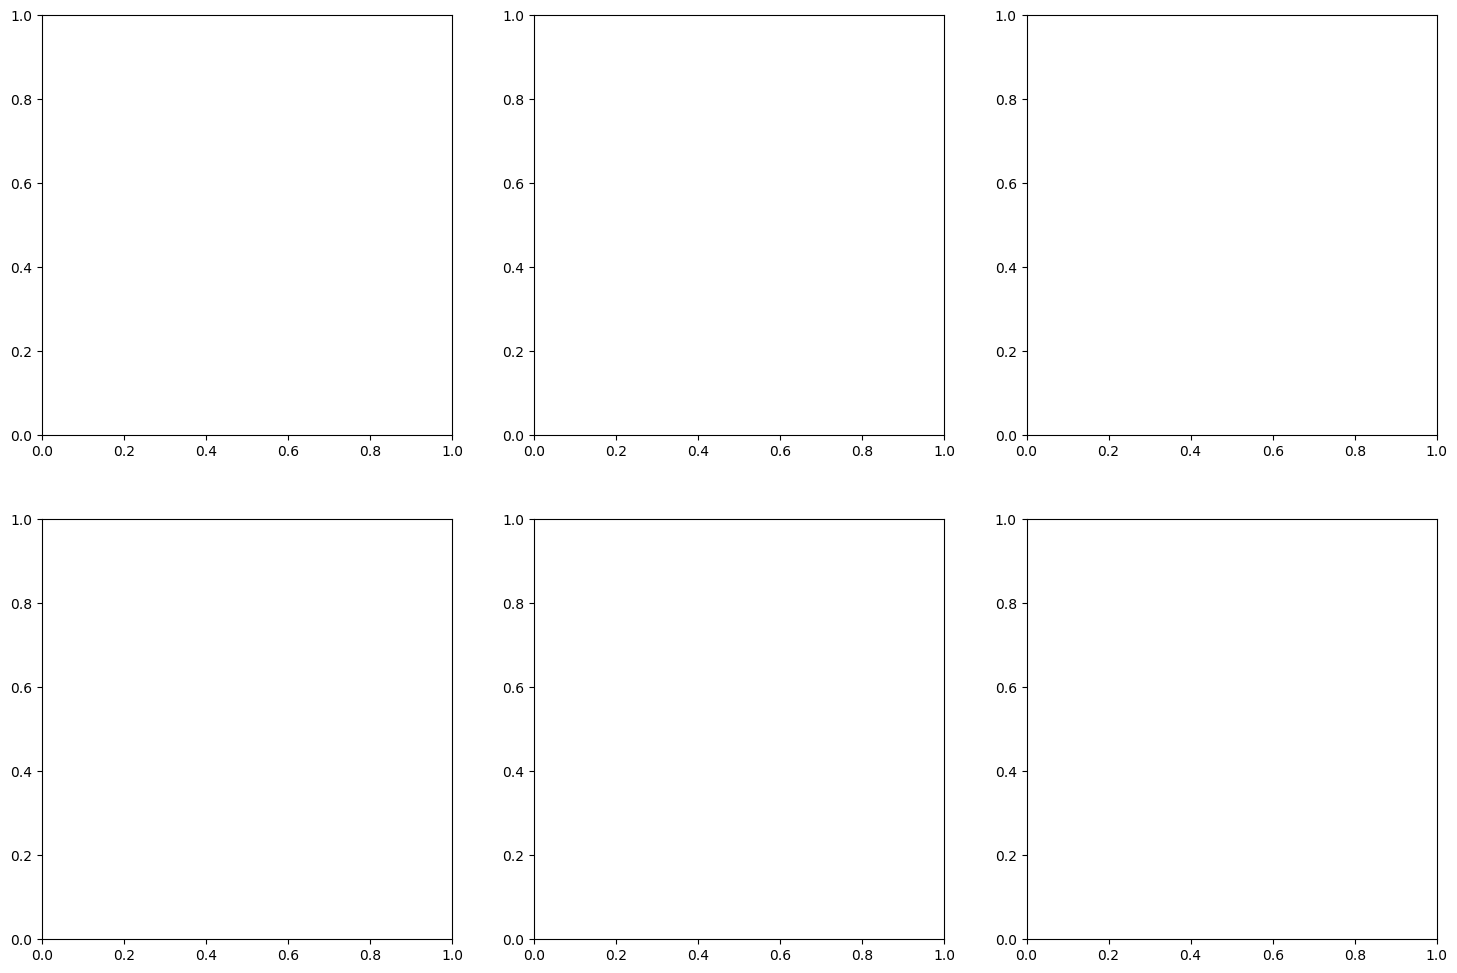

<class 'TypeError'>: list indices must be integers or slices, not str

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_visualizations(data, target_column):
    # Assuming 'data' is a DataFrame with all relevant columns
    # 'target_column' is 'Price'

    # Create figure and subplots
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Scatter plots
    scatter_cols = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
    for i, col in enumerate(scatter_cols, start=1):
        axs[0, i-1].scatter(data[col], data[target_column])
        axs[0, i-1].set_xlabel(col)
        axs[0, i-1].set_ylabel(target_column)
        axs[0, i-1].set_title(f'{col} vs {target_column}')

    # 2. Box plots
    box_cols = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
    for i, col in enumerate(box_cols, start=1):
        sns.boxplot(x=data[col], y=data[target_column], ax=axs[1, i-1])
        axs[1, i-1].set_xlabel(col)
        axs[1, i-1].set_ylabel(target_column)
        axs[1, i-1].set_title(f'{col} vs {target_column}')

    # Flatten the subplots axis to show all plots in a grid
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and it contains the columns: ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD', 'Price']
# plot_visualizations(df, 'Price')

# Example usage:
# Assuming 'df' is your DataFrame and it contains the columns: ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD', 'Price']


df = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD', 'Price']
plot_visualizations(df, 'Price')

In [11]:
# 
# 建立參數視覺化
#

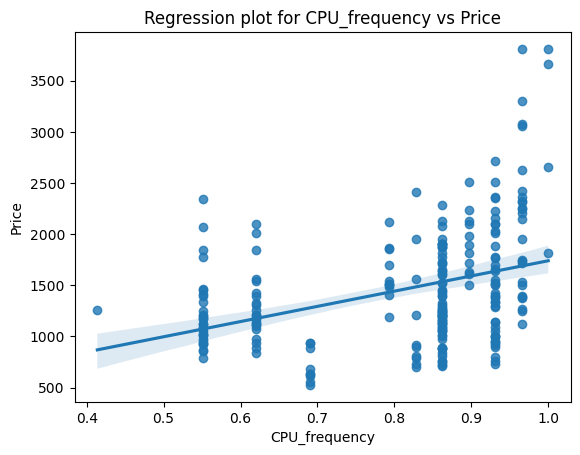

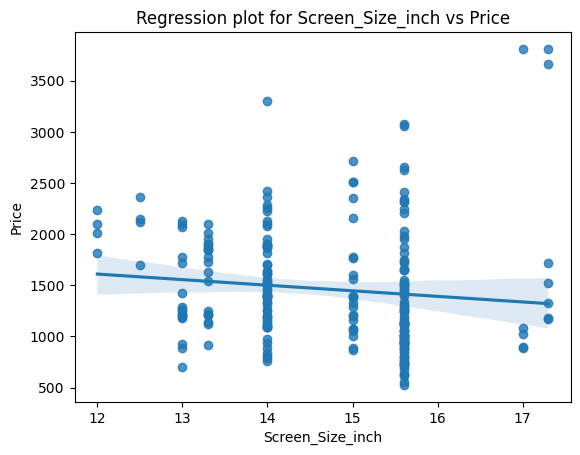

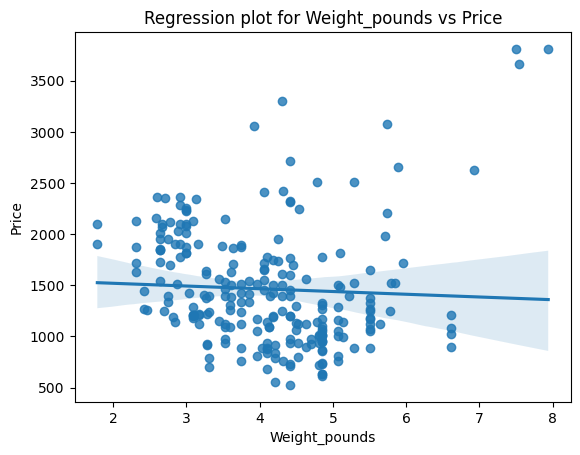

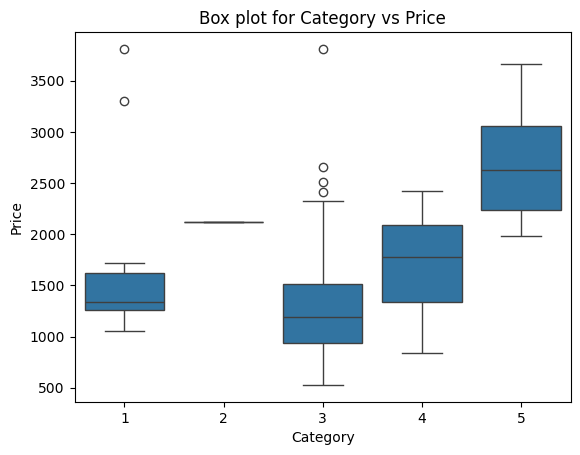

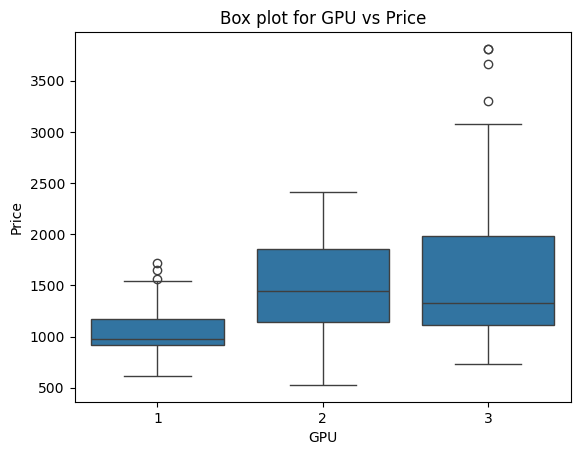

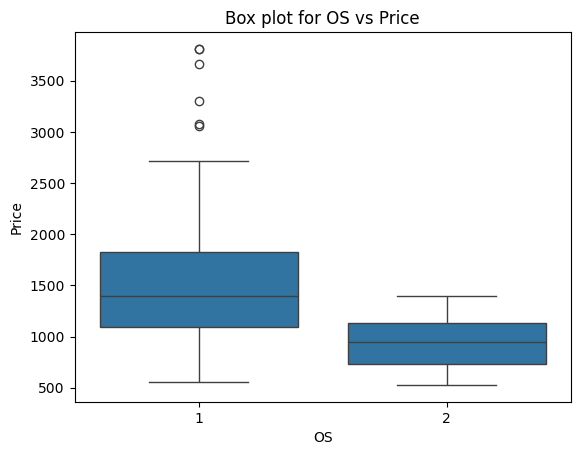

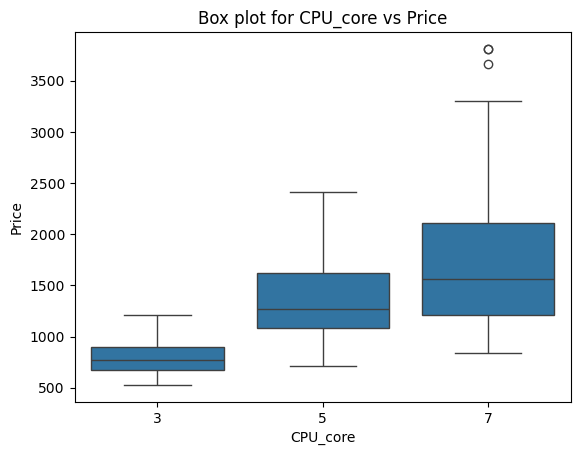

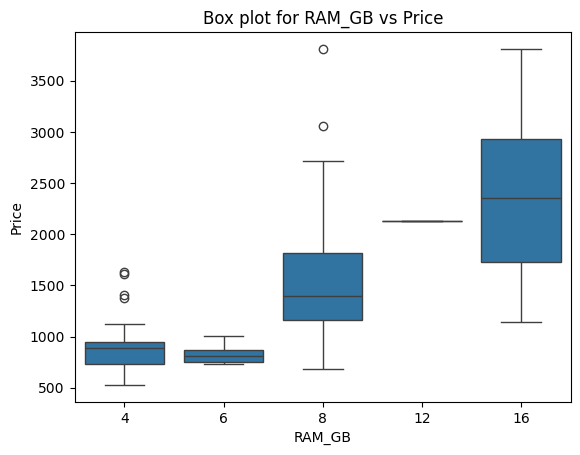

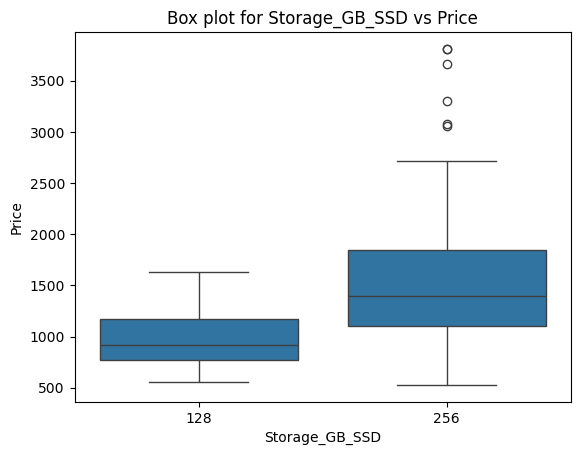

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
data = pd.read_csv('dataset.csv')

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [13]:
#
# Evaluate dependence
#

In [14]:
import pandas as pd
from scipy import stats

def evaluate_correlations(data, target_column):
    # List of numerical columns excluding the target
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Initialize an empty list to hold the results
    results = []

    # For each numerical column, calculate correlation and p-value with 'Price'
    for col in numerical_cols:
        if col != target_column:
            corr, p_value = stats.pearsonr(data[col], data[target_column])
            results.append({'Attribute': col, 'Correlation': corr, 'P-value': p_value})

    # Create a DataFrame from the results list
    correlation_df = pd.DataFrame(results)
    
    # Print the correlation DataFrame
    print(correlation_df)

# Example usage:
# Assuming 'df' is your DataFrame and it contains the columns: ['Price', 'CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
# evaluate_correlations(df, 'Price')

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Assuming your dataframe has a target attribute 'Price'
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0.1          Unnamed: 0.1           0.321933             0.321933   
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   
Screen-Full_HD      Screen-Full_HD          -0.021075           

In [16]:
#
# Grouping and pivots
#

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def group_and_plot(df):
    # Step 1: Create a pivot table
    pivot_table = pd.pivot_table(df, 
                                values='Price', 
                                index='GPU', 
                                columns='CPU_core', 
                                aggfunc='mean', 
                                fill_value=0)

    # Step 2: Plot with pcolor
    plt.figure(figsize=(10, 8))
    cp = plt.pcolor(pivot_table, edgecolors='k', linestyle='none')

    # Add color bar indicating price values
    plt.colorbar(cp)
    plt.title('Pcolor Plot of GPU, CPU_core and Mean Price')
    plt.ylabel('CPU Cores')
    plt.xlabel('GPU')

    # Format the text annotations for better readability
    for (i, j), color in np.ndenumerate(pivot_table):
        plt.text(j + 0.5, i + 0.5, f'{color:.2f}', ha='center', va='center', color='black')

    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing columns ['GPU', 'CPU_core', 'Price']
# group_and_plot(df)

In [18]:
# Grouping and pivots
# You can perform another form of exploratory data analysis by grouping different variables 
# to create a pivot table, which serves as a matrix of different combinations of values 
# as seen in the grouped variables. The respective value of the matrix 
# is the average of all values of the target attribute 
# that have the same combination. You can view this kind of matrix using a pcolor plot.

# Say you need to create a group with parameters GPU, CPU_core and Price. 
# You need a Pivot table, considering Price as the target variable and pcolor plot for that table.


# 分組和樞軸
# 您可以透過對不同的變數進行分組來建立資料透視表，從而執行另一種形式的探索性資料分析，
# 該資料透視表可作為分組變數中所見值的不同組合的矩陣。
# 矩陣的對應值是具有相同組合的所有目標屬性值的平均值。您可以使用 pcolor 圖來查看這種矩陣。

# 假設您需要建立一個包含參數GPU、CPU_core和 的群組Price。
# 您需要一個資料透視表，將其視為Price該表的目標變數和 pcolor 圖。

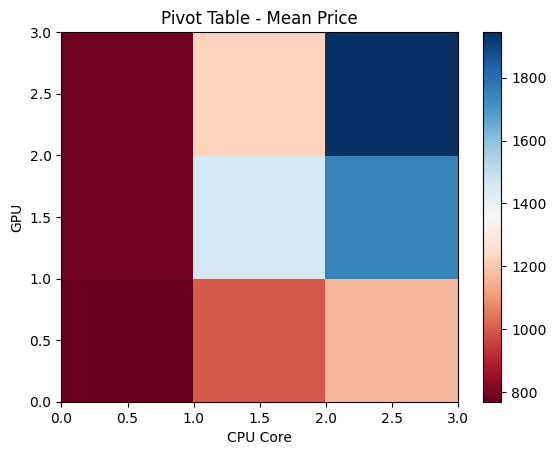

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()

In [20]:
# file_path = 'path_to_your_file.csv'
# result = import_and_describe_data(file_path)
# print(result)